#Encriptado de Imagenes Con Fractales
---

Escuela Superior de Fisico y Matematicas

Licenciatura En Matematica Algoritmica

**Criptología**

Profesor: Gamaliel Yafte Tellez Sanchez

Alumno: Victor Hugo Martinez Huicochea

#Importamos librerias

In [24]:
import numpy as np
import random
import copy
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Llave y parametros clave

In [27]:
#Color nos dara los colores que habra disponibles para los fractales generados
color=[(218,247,166),(255,195,0),(255,87,51),(199,0,57),(88,24,69)]
#Ancho y alto de la imagen (deben ser iguales)
ancho,alto=500,500

k="nuevetacozconsalsa"
#k="holisconpollo"
#Complementamos hasta que sea divisible por 6
while(len(k)%6!=0):
  k+="w"
print("Se usara entonces la siguiente palabra:",k)


Se usara entonces la siguiente palabra: nuevetacozconsalsa


# Creacion de Fractal con Metodo 1

Cada FI se da con la contraseña partida sobre 6:
$$
\begin{equation}
f_i=λ
\begin{pmatrix}
\frac{1}{ord(n_1)} & \frac{1}{ord(n_2)}\\
\frac{1}{ord(n_3)} & \frac{1}{ord(n_4)}
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
+
\begin{pmatrix}
n_5\\
n_6
\end{pmatrix}
\end{equation}
$$
Sin embargo como se quiere agregar variedad utilizaremos matrices con algunos elementos en 0.

Usando (0,0) como punto de partida e iterando 10k veces de la siguiente manera:
$$
x_0=(0,0)\\
x_1=f_i(x_0)\\
.\\
.\\
.\\
x_n=f_i(x_{n-1})
$$

También cabe mencionar que sea p un numero, entonces:
$$
\lambda=\frac{1}{2^p}
$$

In [28]:
#Obtendremos cuantos paquetes de 6 letras tenemos
fi=int(len(k)/6)
#Aqui guardaremos las Transformaciones lineales
FM=[]
#Aplicaremos variedad a las Transformaciones lineales para favorecer la forma fractal
Variedad=np.array(
    [[[1,1],
     [0,1]],
    [[1,0],
     [0,1]],
    [[1,0],
     [1,1]],]
    )

#Por cada 6 letras se creara una contraccion
for i in range(fi):
  ki=k[i*6:(i+1)*6]
  #Matriz 2x2
  M22=np.zeros((2,2))
  #Matriz que se suma
  M2=np.ones((2,1))

  #Hacemos la matriz de multiplicacion
  for j in range(2):
    for l in range(2):
      M22[j][l]=Variedad[i%4][j][l]*1/(ord(ki[2*j+l])-96)
  #Hacemos la suma
  for j in range(2):
    M2[j][0]=1/(ord(ki[4+j])-96)
  #Los agregamos
  FM.append([M22,M2])


In [29]:
#Aqui aplicamos la funcion
def JC(i,x,y):
  #Elejimos a=1/2^p
  a=1/(2**7)
  cord=np.array([[x],[y]])
  #Aplicamos la funcion
  newcord=a*(FM[i][0]@cord)+FM[i][1]
  return (newcord[0][0],newcord[1][0])



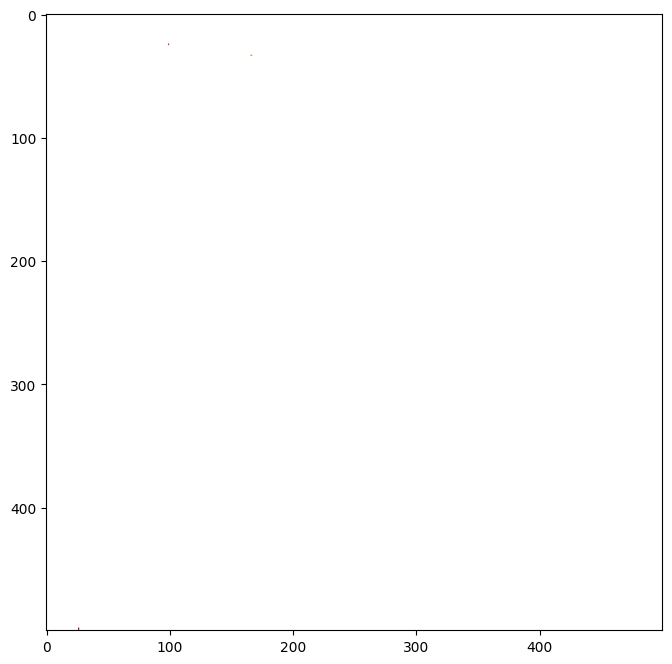

In [30]:
fig = plt.figure(figsize=(8, 8))
outv1 = Image.new(mode = "RGB", size = (ancho, alto), color = (255, 255, 255))



#Escogemos una funcion para el SFI
r=random.randint(0,len(FM)-1)
#Punto inicial en (0,0)
point=(0,0)
aux=[]
aux.append(point)

#Para escalar funciones
maximo=0

#En 10,000 iteraciones
for i in range(10000):
  #Escogemos funcion
  r=random.randint(0,len(FM)-1)
  #La evaluamos
  point=JC(r,point[0],point[1])

  #Actualizamos maximo y agregamos
  if maximo<np.max(point):
    maximo=np.max(point)
  aux.append(point)

#Obtenemos la Escala e imprimimos con 5 colores
escala=(ancho-1)/maximo
for i in range(len(aux)):
  outv1.putpixel((int(aux[i][0]*escala),int(aux[i][1]*escala)),color[i%5])

plt.imshow(outv1)


#Creacion de Fractal con Metodo 2

Para este método nos basaremos en el siguiente artículo:


> Mavares Ferrer, P. J. (2020). Visualización del Juego del Caos para un sistema de funciones iteradas no hiperbólico. REVISTA ODIGOS, 1(2), 9–20. https://doi.org/10.35290/ro.v1n2.2020.302



Así pues, solo hay que modificar un poco la versión del método 1 del programa.

In [31]:
a=1/2
ang=np.pi*180/45
rot=np.array([[np.cos(ang),-np.sin(ang)],[np.sin(ang),np.cos(ang)]])
def JC(i,x,y):
  cord=np.array([[x],[y]])
  newcord=FM[i][0]@cord+FM[i][1]
  newcord=((cord+a*(newcord-cord)).T@rot).T
  return (newcord[0][0],newcord[1][0])

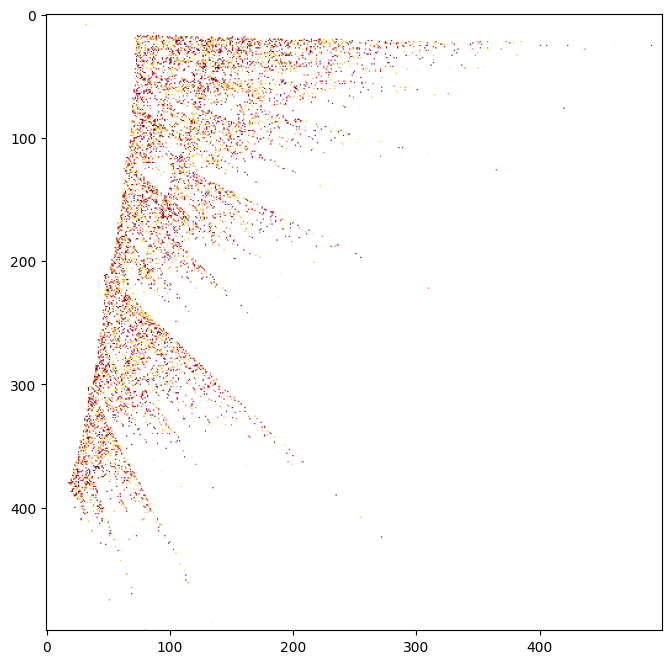

In [32]:
fig = plt.figure(figsize=(8, 8))
#Creamos imagen de 500 pixeles por 500 pixeles
outv2 = Image.new(mode = "RGB", size = (ancho, alto), color = (255, 255, 255))



#Escogemos una funcion para el SFI
r=random.randint(0,len(FM)-1)
#Punto inicial en (0,0)
point=(0,0)
aux=[]
aux.append(point)

#Para escalar funciones
maximo=0

#En 10,000 iteraciones
for i in range(10000):
  #Escogemos funcion
  r=random.randint(0,len(FM)-1)
  #La evaluamos
  point=JC(r,point[0],point[1])

  #Actualizamos maximo y agregamos
  if maximo<np.max(point):
    maximo=np.max(point)
  aux.append(point)

#Obtenemos la Escala e imprimimos con 5 colores
escala=(ancho-1)/maximo
for i in range(len(aux)):
  outv2.putpixel((int(aux[i][0]*escala),int(aux[i][1]*escala)),color[i%5])

plt.imshow(outv2)

# Encriptado

Obtenemos una imagen de internet para su uso

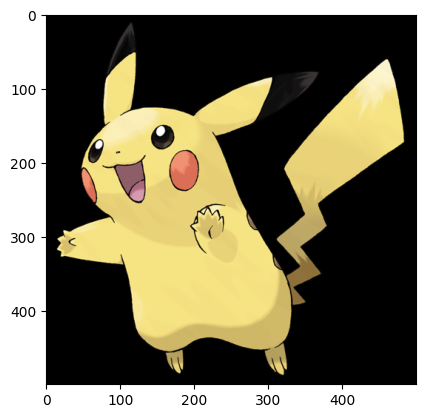

In [33]:
# URL de la imagen
url = "https://static.wikia.nocookie.net/espokemon/images/7/77/Pikachu.png/revision/latest?cb=20150621181250"

# Descargar la imagen y la cargamos
response = requests.get(url)
img_org = Image.open(BytesIO(response.content))

#Transformamos la imagen a RGB con tamaño dado
img=img_org.convert('RGB').resize((ancho,alto))

# Mostramos la imagen
plt.imshow(img)
plt.show()

Hacemos XOR con los fractales generados, a la izquierda estará el generado por el método 1 y a la derecha el del método 2

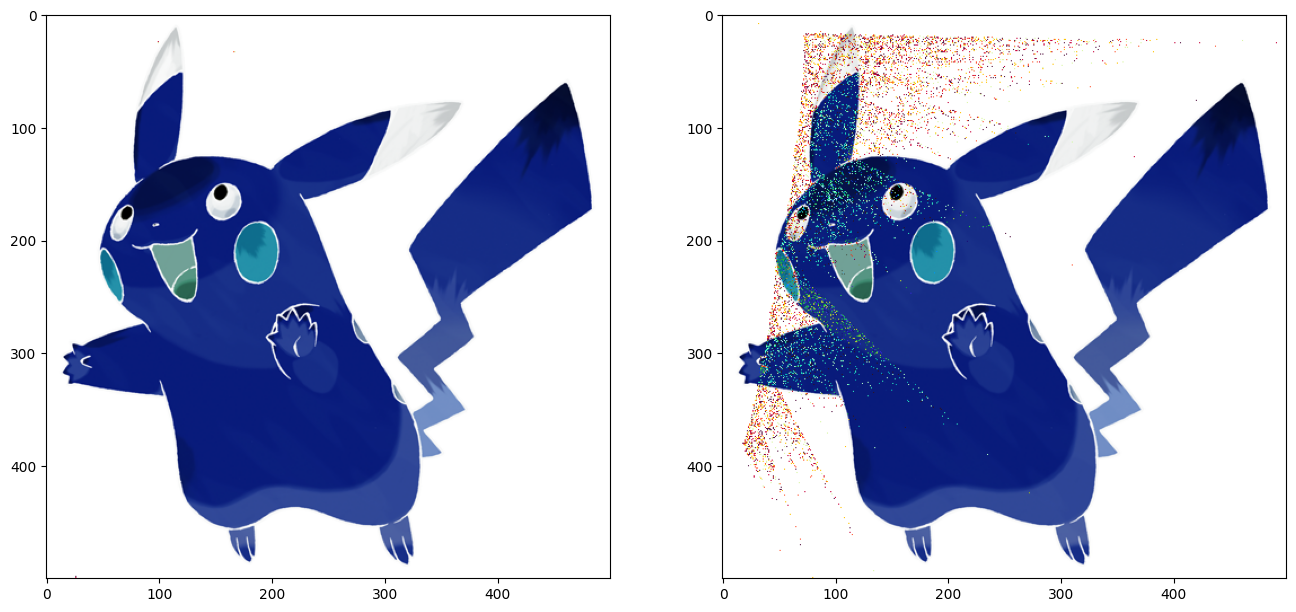

In [46]:
fig = plt.figure(figsize=(16, 16))
#Creamos imagen de 500 pixeles por 500 pixeles
Encr1 = Image.new(mode = "RGB", size = (ancho, alto), color = (255, 255, 255))
Encr2 = Image.new(mode = "RGB", size = (ancho, alto), color = (255, 255, 255))

#Encriptamos la imagen
for x in range(ancho):
  for y in range(alto):
      #Verificamos que sea parte del conjunto compacto
      colorg=img.getpixel((x, y))
      color1= outv1.getpixel((x, y))
      color2= outv2.getpixel((x, y))

      Encr1.putpixel((x,y), (color1[0]^colorg[0],color1[1]^colorg[1],color1[2]^colorg[2]))
      Encr2.putpixel((x,y), (color2[0]^colorg[0],color2[1]^colorg[1],color2[2]^colorg[2]))
fig.add_subplot(1, 2, 1)
plt.imshow(Encr1)
fig.add_subplot(1, 2, 2)
plt.imshow(Encr2)
plt.show()

Permutamos filas y columnas

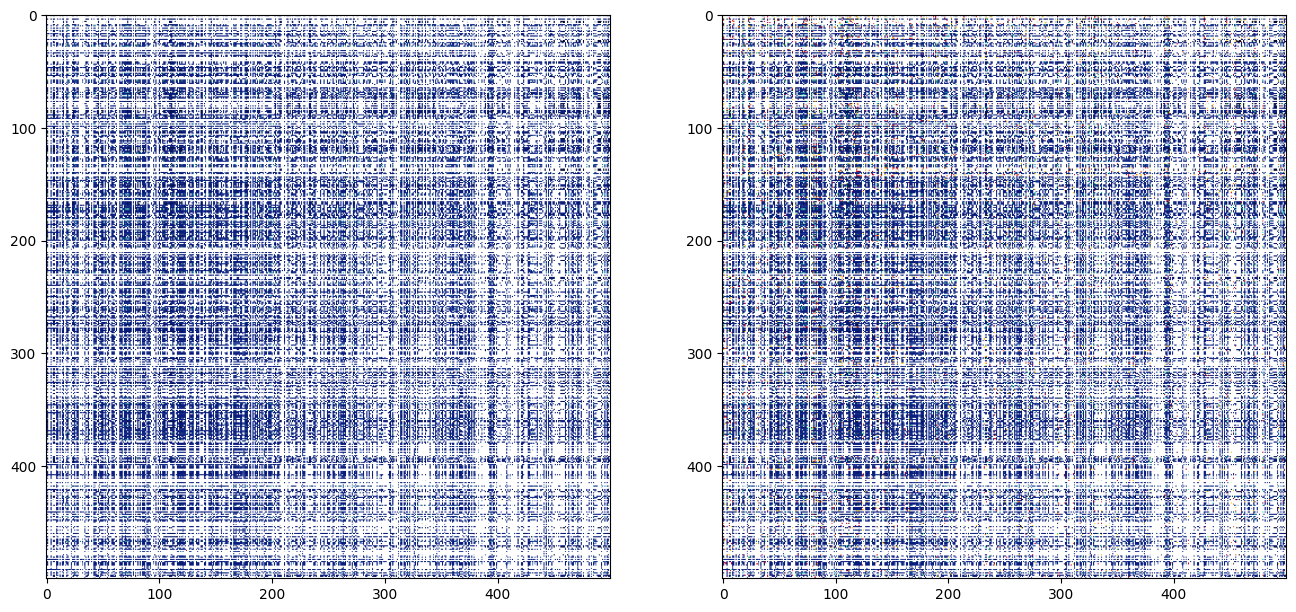

In [47]:
#Cargamos permutacion
PERM=[179, 5, 390, 100, 24, 38, 338, 263, 280, 153, 395, 254, 428, 93, 414, 196, 79, 216, 400, 52, 417, 33, 375, 276, 90, 472, 59, 35, 449, 97, 363, 175, 57, 21, 31, 83, 481, 157, 60, 176, 331, 168, 304, 244, 456, 295, 416, 193, 419, 269, 89, 393, 227, 339, 439, 226, 166, 475, 240, 248, 283, 385, 20, 171, 107, 467, 349, 360, 446, 195, 376, 113, 148, 188, 282, 91, 40, 464, 205, 96, 221, 319, 239, 145, 126, 224, 223, 109, 204, 308, 63, 251, 262, 478, 358, 147, 459, 219, 440, 191, 13, 355, 250, 347, 284, 158, 424, 231, 182, 443, 342, 490, 290, 123, 434, 46, 15, 55, 370, 352, 267, 324, 369, 213, 441, 180, 421, 484, 159, 300, 289, 488, 320, 389, 208, 50, 317, 293, 149, 368, 448, 372, 37, 77, 387, 245, 415, 321, 210, 118, 480, 86, 427, 336, 49, 4, 359, 392, 332, 225, 172, 85, 435, 121, 257, 361, 125, 220, 174, 43, 318, 310, 167, 436, 323, 136, 183, 388, 296, 409, 81, 457, 498, 230, 256, 259, 470, 258, 106, 141, 410, 243, 187, 316, 211, 82, 402, 73, 384, 71, 285, 377, 19, 199, 110, 23, 215, 28, 65, 425, 497, 260, 485, 115, 462, 288, 209, 401, 173, 165, 381, 222, 7, 429, 460, 120, 201, 315, 299, 408, 494, 373, 305, 185, 133, 228, 371, 129, 351, 422, 326, 14, 135, 246, 162, 407, 72, 27, 473, 477, 291, 154, 122, 164, 41, 12, 334, 87, 25, 116, 335, 237, 292, 39, 194, 170, 452, 177, 44, 84, 354, 345, 66, 202, 344, 134, 396, 48, 101, 474, 76, 418, 365, 468, 233, 198, 302, 128, 10, 104, 411, 445, 218, 151, 169, 362, 67, 353, 364, 438, 189, 357, 476, 463, 8, 160, 92, 271, 433, 469, 444, 186, 356, 386, 54, 294, 496, 105, 42, 75, 197, 207, 495, 492, 394, 200, 132, 268, 278, 17, 399, 143, 234, 279, 322, 397, 29, 383, 447, 51, 493, 454, 382, 161, 426, 264, 156, 272, 192, 190, 95, 206, 146, 163, 348, 378, 22, 274, 88, 119, 56, 9, 2, 94, 99, 62, 287, 184, 74, 286, 391, 58, 178, 298, 432, 11, 236, 329, 333, 108, 235, 403, 111, 53, 340, 277, 346, 127, 70, 327, 212, 431, 3, 102, 379, 64, 142, 130, 465, 380, 437, 229, 313, 155, 36, 61, 68, 139, 261, 328, 450, 297, 405, 406, 131, 281, 491, 309, 117, 398, 466, 137, 325, 247, 330, 249, 255, 366, 78, 6, 114, 307, 26, 30, 18, 275, 483, 337, 238, 252, 423, 265, 253, 0, 486, 343, 430, 16, 112, 241, 458, 442, 150, 266, 217, 404, 303, 374, 461, 420, 138, 273, 181, 34, 455, 301, 306, 80, 412, 312, 314, 45, 242, 124, 367, 499, 140, 487, 482, 270, 152, 451, 489, 471, 1, 69, 479, 103, 144, 341, 214, 453, 232, 32, 98, 47, 413, 350, 203, 311]

#Convertimos a arrays manejables
fig = plt.figure(figsize=(16, 16))
img_array1 = np.array(Encr1)
img_array2 = np.array(Encr2)

#Permutamos filas
for i in range(len(PERM)):
  img_array1[[i,PERM[i]]]=img_array1[[PERM[i],i]]
  img_array2[[i,PERM[i]]]=img_array2[[PERM[i],i]]
#Permutamos Columnas
for i in range(len(PERM)):
  img_array1[:,[i,PERM[i]]]=img_array1[:,[PERM[i],i]]
  img_array2[:,[i,PERM[i]]]=img_array2[:,[PERM[i],i]]
#Devolvemos a imagen
Encr1=Image.fromarray(img_array1)
Encr2=Image.fromarray(img_array2)

#Graficamos
fig.add_subplot(1, 2, 1)
plt.imshow(Encr1)
fig.add_subplot(1, 2, 2)
plt.imshow(Encr2)
plt.show()